### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
print("Libraries imported successfully.")

Libraries imported successfully.


### Load and Prepare the Dataset
##### Load the Iris dataset

In [9]:
iris = load_iris()
df = pd.DataFrame(data=np.c_[
    iris['data'], 
    iris['target']],
    columns=iris['feature_names'] + ['target'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
df['is_setosa'] = (df['target'] == 0).astype(int)
X = df[['sepal_length', 'sepal_width']].values
y = df['is_setosa'].values

print("Data loaded and prepared.")
print("Sample data (first 5 rows):")
print(df.head())
print("-" * 50)

Data loaded and prepared.
Sample data (first 5 rows):
   sepal_length  sepal_width  petal_length  petal_width  target  is_setosa
0           5.1          3.5           1.4          0.2     0.0          1
1           4.9          3.0           1.4          0.2     0.0          1
2           4.7          3.2           1.3          0.2     0.0          1
3           4.6          3.1           1.5          0.2     0.0          1
4           5.0          3.6           1.4          0.2     0.0          1
--------------------------------------------------


### Split the data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

print("Data split into training and testing sets")
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print("-"*50)

Data split into training and testing sets
Training data shape: (105, 2)
Testing data shape: (45, 2)
--------------------------------------------------


### Model's Core Components [Sigmoid function]

In [14]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

num_features = x_train.shape[1]
w = np.zeros(num_features)
b = 0

print("Sigmoid function defined and parameters initialized.")

Sigmoid function defined and parameters initialized.


### Train the Model using Gradient Descent

In [15]:
learning_rate = 0.01
num_iterations = 1000

for i in range(num_iterations):
    z = np.dot(x_train, w) + b
    y_hat = sigmoid(z)
    # Calculate the gradients of the cost function with respect to weights and bias

    dw = (1/len(x_train)) * np.dot(x_train.T, (y_hat - y_train))
    db = (1/len(x_train)) * np.sum(y_hat - y_train)

    # Update the parameters

    w = w - learning_rate * dw
    b = b - learning_rate * db

    if (i % 100 == 0):
        print(f"Iteration {i}: Weights = {w}, Bias = {b}")

print("Model training complete")
print("-" * 50)


Iteration 0: Weights = [-0.01357619 -0.00450476], Bias = -0.0018571428571428573
Iteration 100: Weights = [-0.22161495  0.12994894], Bias = 0.004517586902550194
Iteration 200: Weights = [-0.31820192  0.30666864], Bias = 0.02728135213616103
Iteration 300: Weights = [-0.4092679   0.47184496], Bias = 0.04873379535312914
Iteration 400: Weights = [-0.4951287   0.62637678], Bias = 0.06899147926900992
Iteration 500: Weights = [-0.57612996  0.77117136], Bias = 0.08816585721383045
Iteration 600: Weights = [-0.6526293  0.9071023], Bias = 0.10635951075618086
Iteration 700: Weights = [-0.72497956  1.03498663], Bias = 0.12366511058777048
Iteration 800: Weights = [-0.79351798  1.15557357], Bias = 0.14016543467219492
Iteration 900: Weights = [-0.85856004  1.26954139], Bias = 0.15593396007706178
Model training complete
--------------------------------------------------


### Make Predictions and Evalute the Model

In [16]:
z_test = np.dot(x_test, w) + b
y_pred_proba = sigmoid(z_test)
y_pred_class = (y_pred_proba >= 0.5).astype(int)

# calculate accuray

accuracy = accuracy_score(y_test, y_pred_class)
print(f"model Accuracy on the test set: {accuracy * 100:.2f}%")
print("-" * 50)

model Accuracy on the test set: 95.56%
--------------------------------------------------


### Visualize the Decision Boundary

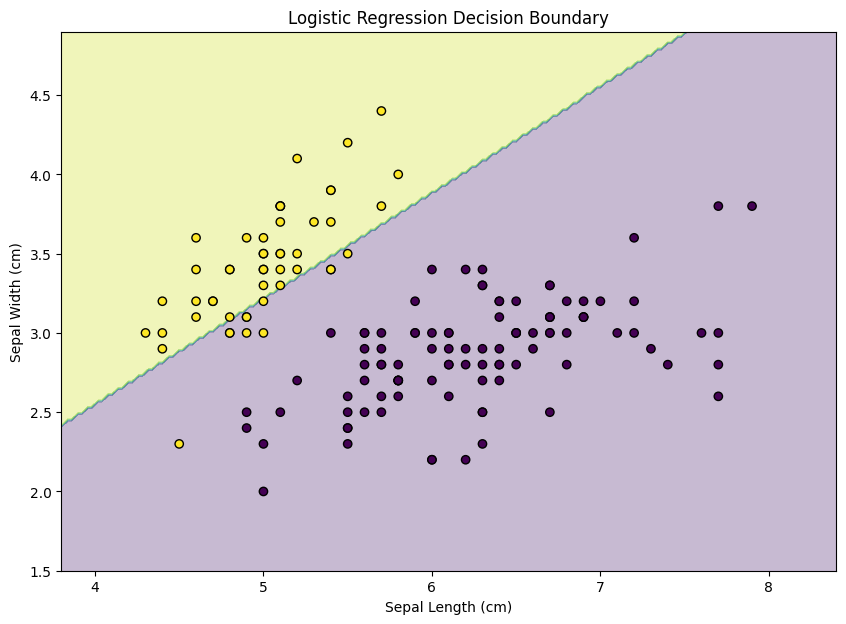

Decision boundary plot generated.


In [19]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

z = (np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
z = sigmoid(z)
z = (z >= 0.5).astype(int)
z = z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

print("Decision boundary plot generated.")